# Capstone Project - The Battle of Neighborhoods (Week 2)

## Import Libraries

In [1]:
import json, requests
import os
import geopandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium

pd.options.display.max_rows = None
pd.options.display.max_columns = None


We proceed to import the Sandakan neighbourhood csv file which consists the places, names, location, latitude and longtitude.

### Sandakan neighbourhood data description:

**Number** = Index number

**Name of neighbourhood** = Neighbourhood Names

**Area** = Area in acres

**Residential units** = Number of residential homes

**Location** = Location of neighbourhood

**Latitude** = Latitude coordinates

**Longtitude** = Longtitude coordinates

## Load data

In [2]:
df = pd.read_csv('sandakan.csv', index_col="Number")

In [3]:
df.head()

,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
Number,,,,,,
1,Airport,41.630,649,"Batu 7, Jalan Lapangan Terbang",5.898035,118.061205
2,Anggerik,15.828,408,Jalan Lintas Sibuga,5.861322,118.037246
3,Astana Height,100.270,483,"Batu 1, Jalan Lalang",5.853584,118.116925
4,Berhala Darat,23.200,192,Jalan Sim-Sim,5.850209,118.130763
5,Bukit Permai,270.890,4142,"Batu 3 1/2, Jalan Utara",5.864637,118.084975


In [4]:
df.tail()

,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
Number,,,,,,
69,Vista,10.70,172,"Batu 7, Jalan Lintas Sibuga",5.858524,118.041216
70,Wijaya,6.03,196,"Batu 7, Jalan Labuk",5.884665,118.045531
71,Wira,9.93,312,Jalan Sibuga,5.849188,118.042680
72,Yeng Seng,11.75,125,"Batu 2 1/2, Jalan Utara",5.858835,118.098056
73,Yii Villa,1.30,100,Jalan Bulis Sim-Sim,5.854239,118.126795


In [5]:
df.shape

(73, 6)

The dataset consists of 73 rows and 6 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 73
Data columns (total 6 columns):
Neighbourhood        73 non-null object
Area                 72 non-null float64
Residential Units    73 non-null int64
Location             70 non-null object
Latitude             68 non-null float64
Longtitude           68 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.0+ KB


In [7]:
df.isnull().sum()  #Count NaN values

Neighbourhood        0
Area                 1
Residential Units    0
Location             3
Latitude             5
Longtitude           5
dtype: int64

Since we need to explore and plot neighbourhoods, I decided to drop NaNs for Latitude and Longtitude

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(65, 6)

In [10]:
df.head()

,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
Number,,,,,,
1,Airport,41.630,649,"Batu 7, Jalan Lapangan Terbang",5.898035,118.061205
2,Anggerik,15.828,408,Jalan Lintas Sibuga,5.861322,118.037246
3,Astana Height,100.270,483,"Batu 1, Jalan Lalang",5.853584,118.116925
4,Berhala Darat,23.200,192,Jalan Sim-Sim,5.850209,118.130763
5,Bukit Permai,270.890,4142,"Batu 3 1/2, Jalan Utara",5.864637,118.084975


In [11]:
df.reset_index()

,Number,Neighbourhood,Area,Residential Units,Location,Latitude,Longtitude
0,1,Airport,41.630,649,"Batu 7, Jalan Lapangan Terbang",5.898035,118.061205
1,2,Anggerik,15.828,408,Jalan Lintas Sibuga,5.861322,118.037246
2,3,Astana Height,100.270,483,"Batu 1, Jalan Lalang",5.853584,118.116925
3,4,Berhala Darat,23.200,192,Jalan Sim-Sim,5.850209,118.130763
4,5,Bukit Permai,270.890,4142,"Batu 3 1/2, Jalan Utara",5.864637,118.084975
5,6,Bunga Matahari,11.880,172,"Batu 4, Jalan Utara",5.865810,118.075874
6,7,Casa San Uno,38.890,307,"Batu 4, Jalan Utara",5.865233,118.072556
7,8,Chrysanthemum,11.400,154,"Batu 1 1/2, Jalan Utara",5.857480,118.105876
8,9,Damai & Sri Taman,21.670,123,"Batu 4, Jalan Utara",5.858482,118.078921
9,10,Evergreen,23.990,48,"Batu 6, Jalan Utara",5.873464,118.057834


Drop number and location columns from dataframe

In [12]:
df = df[['Neighbourhood','Area','Residential Units','Latitude','Longtitude']]

In [13]:
df.reset_index(drop="Number", inplace=True)

In [14]:
#save a cleaned csv file for backup

#df.to_csv('skanclean.csv', index=False)

## Create visualizations for data exploration

In [15]:
df.head()

,Neighbourhood,Area,Residential Units,Latitude,Longtitude
0,Airport,41.630,649,5.898035,118.061205
1,Anggerik,15.828,408,5.861322,118.037246
2,Astana Height,100.270,483,5.853584,118.116925
3,Berhala Darat,23.200,192,5.850209,118.130763
4,Bukit Permai,270.890,4142,5.864637,118.084975


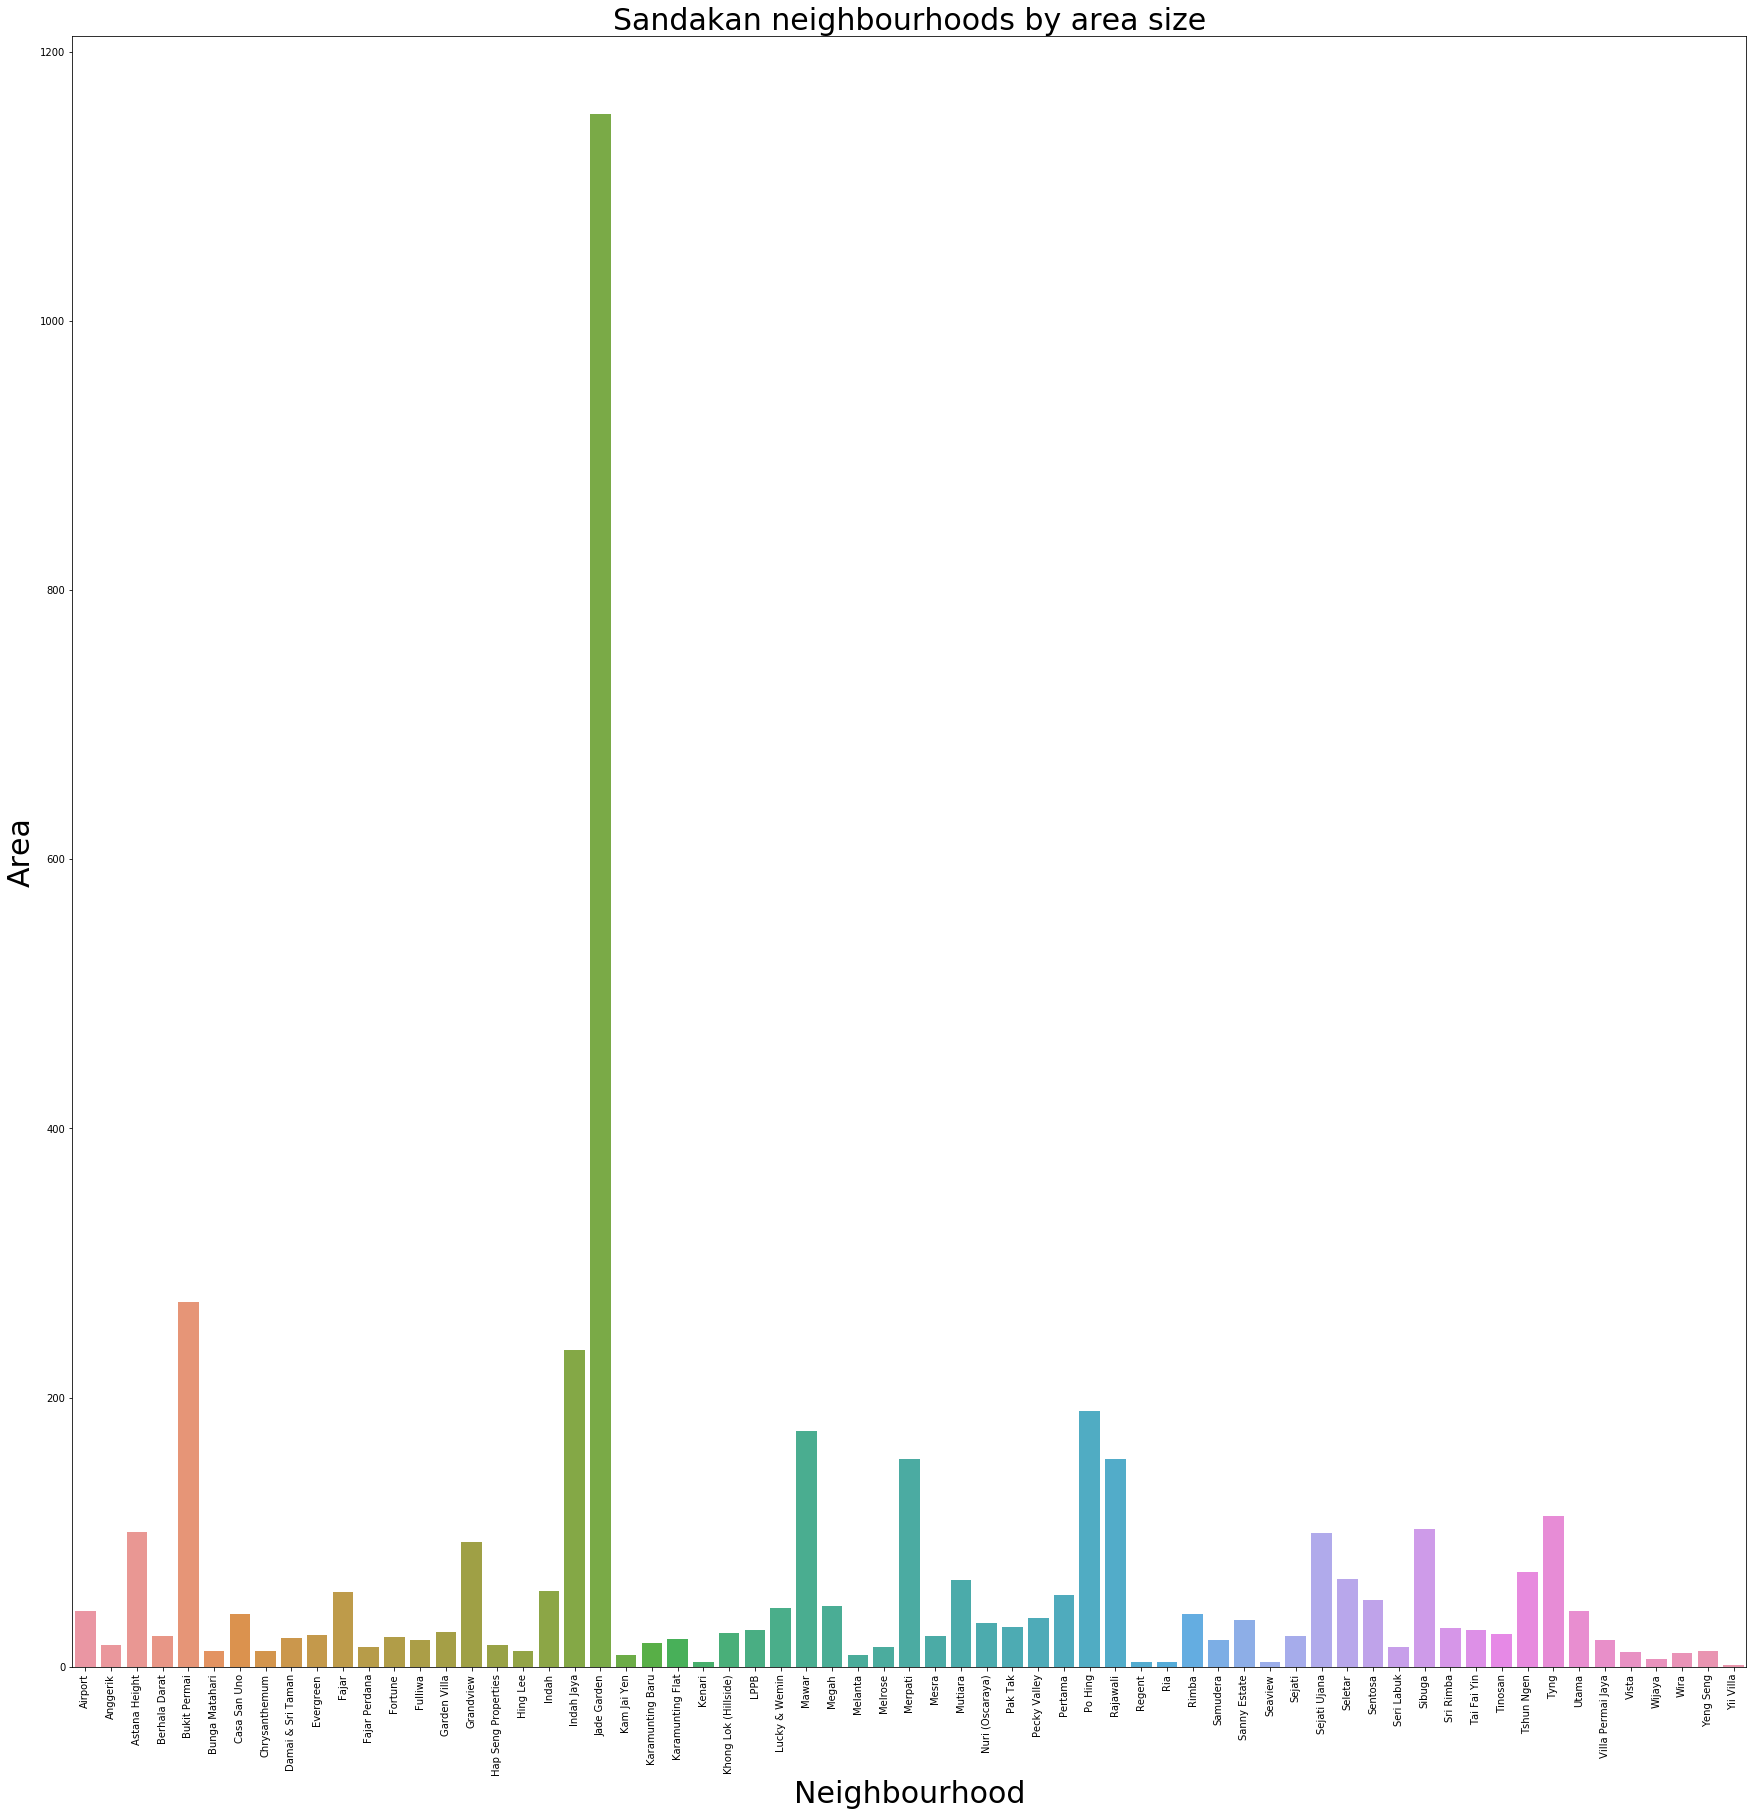

In [16]:
plt.figure(figsize=(30,30))
plt.title('Sandakan neighbourhoods by area size', fontsize=30)
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xticks(rotation='vertical')
sns.barplot(x=df.Neighbourhood,y=df.Area)
plt.show()

**Observation: Jade Garden has largest area**

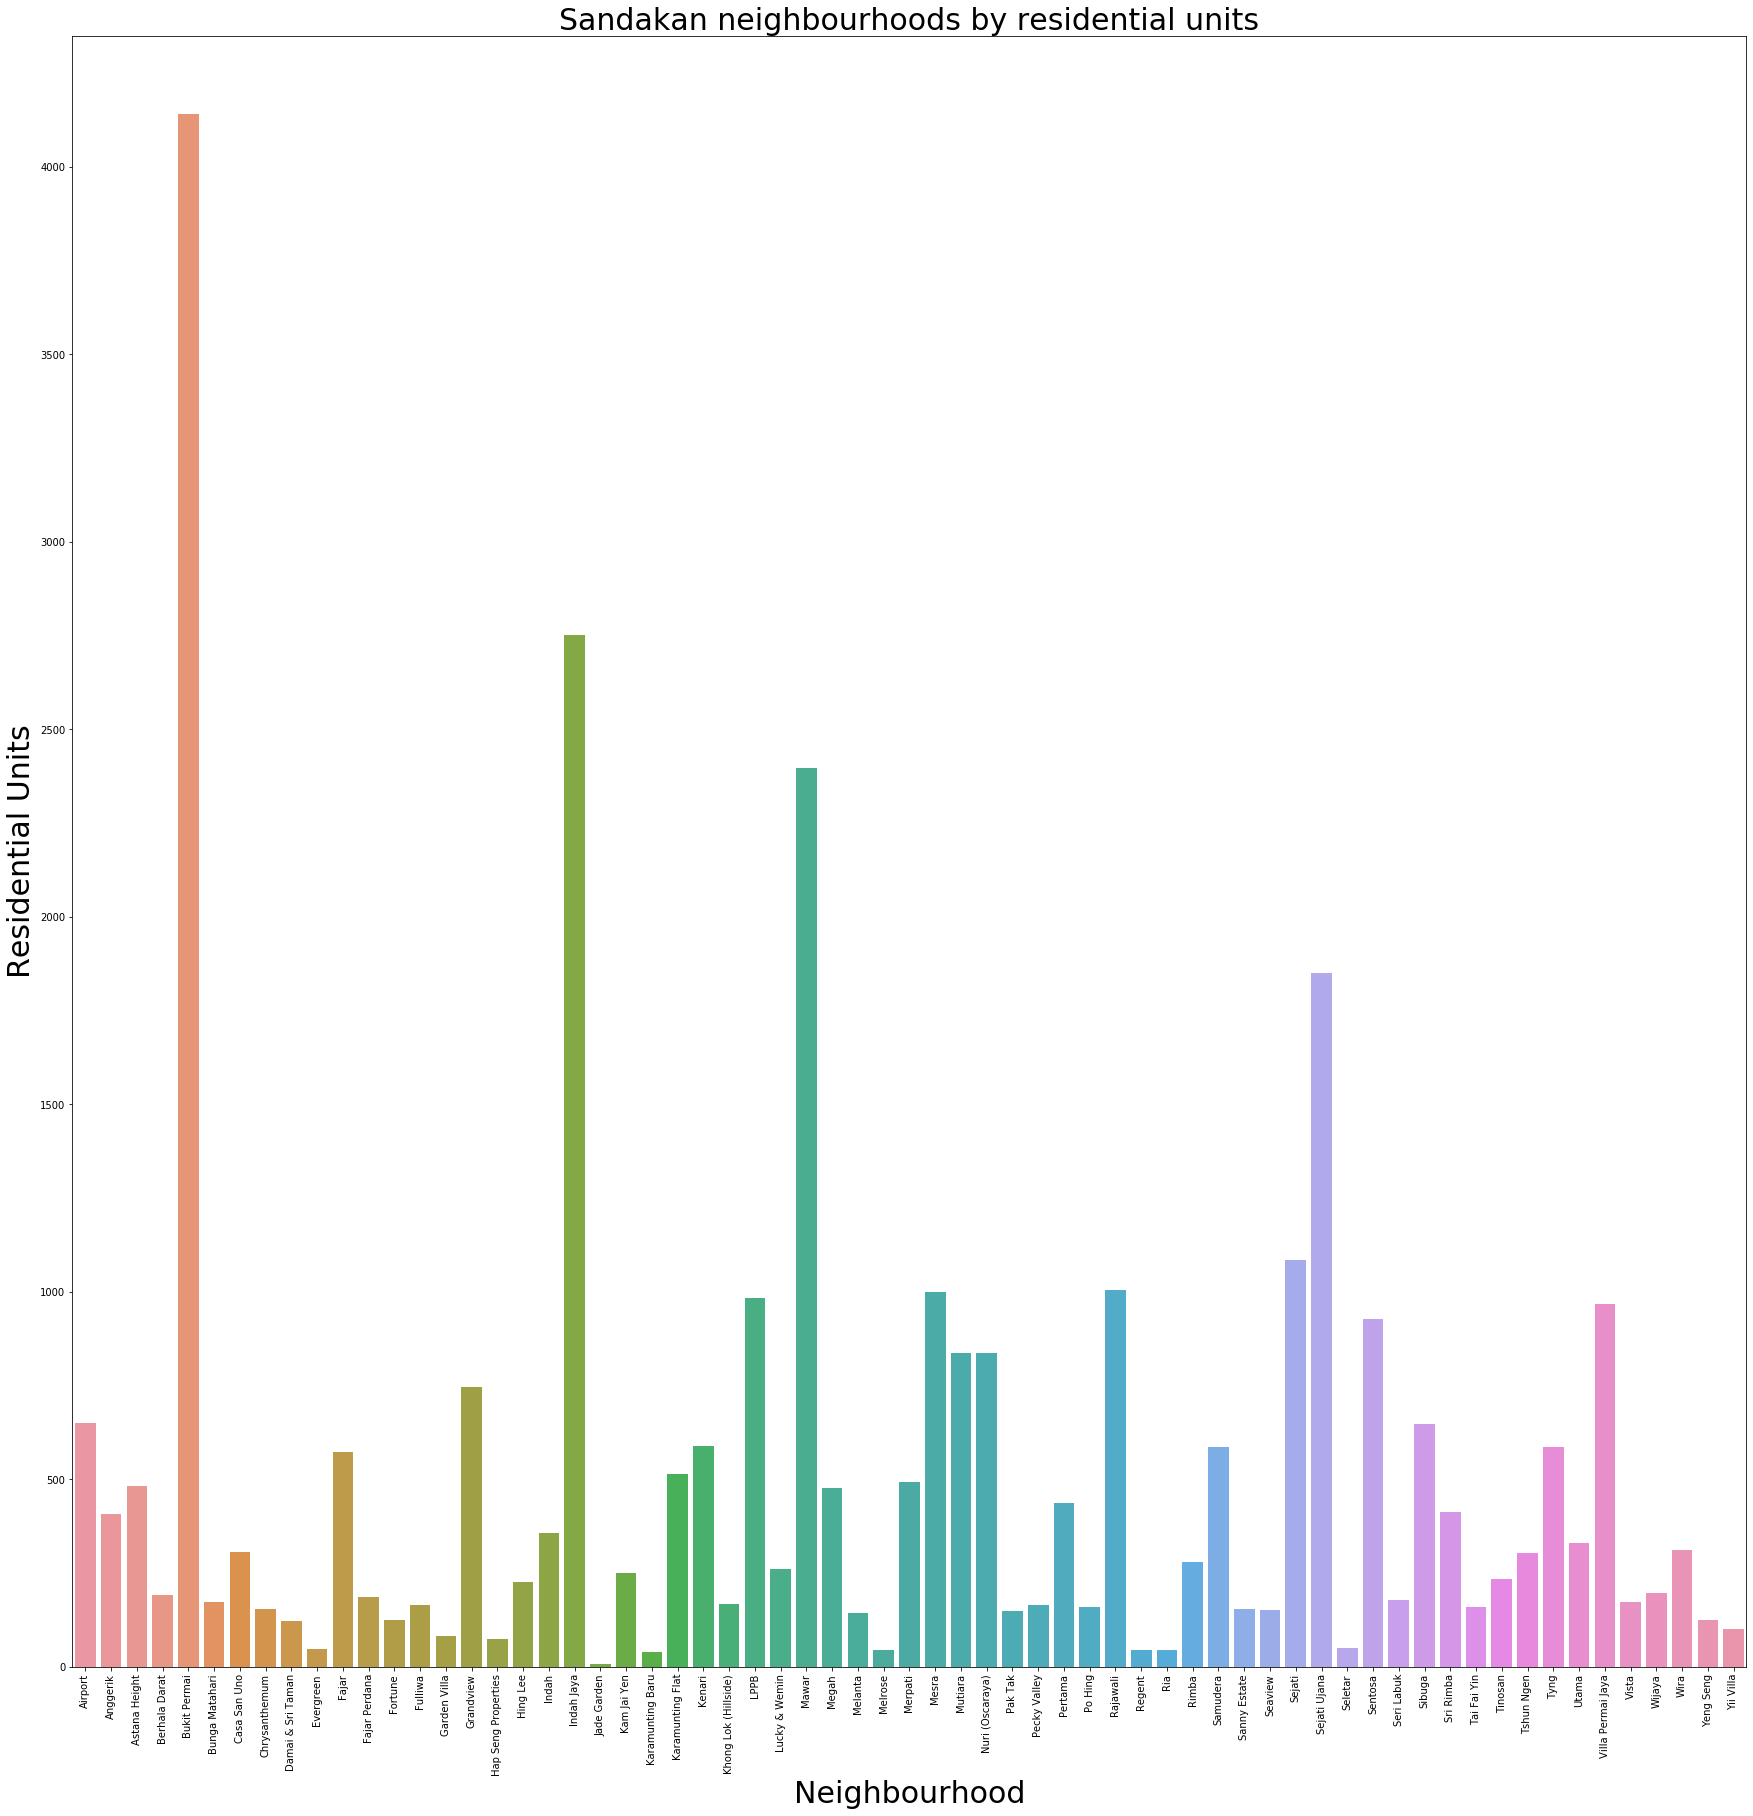

In [17]:
plt.figure(figsize=(30,30))
plt.title('Sandakan neighbourhoods by residential units', fontsize=30)
plt.xlabel('xlabel', fontsize=30)
plt.ylabel('ylabel', fontsize=30)
plt.xticks(rotation='vertical')
sns.barplot(x=df.Neighbourhood,y=df['Residential Units'])
plt.show()

**Observation: Bukit Permai has most number of residential units**

Plotting pairplots to check for any correlation

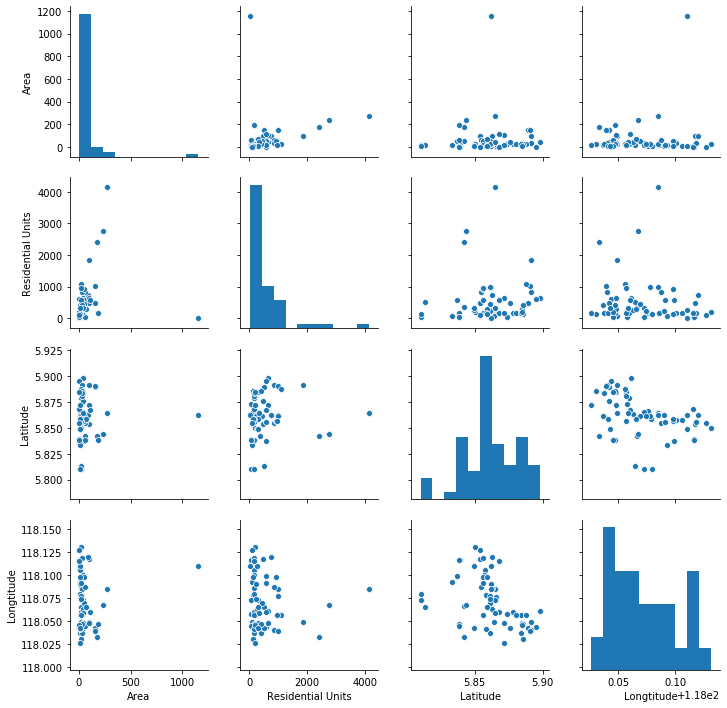

In [18]:
sns.pairplot(df)
plt.show()

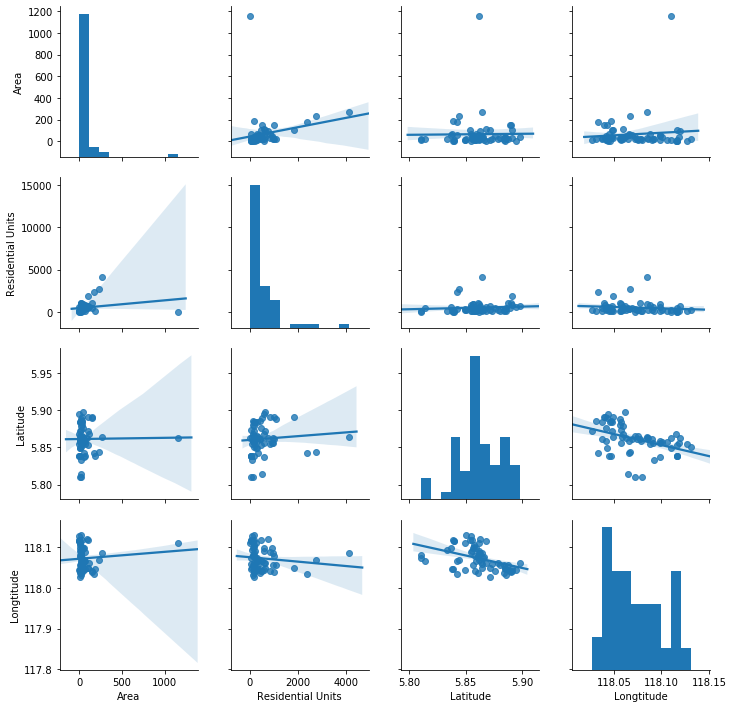

In [19]:
sns.pairplot(df, kind='reg')
plt.show()

**Observation: There seems to be a small linear relationship between Area and Residential Units**

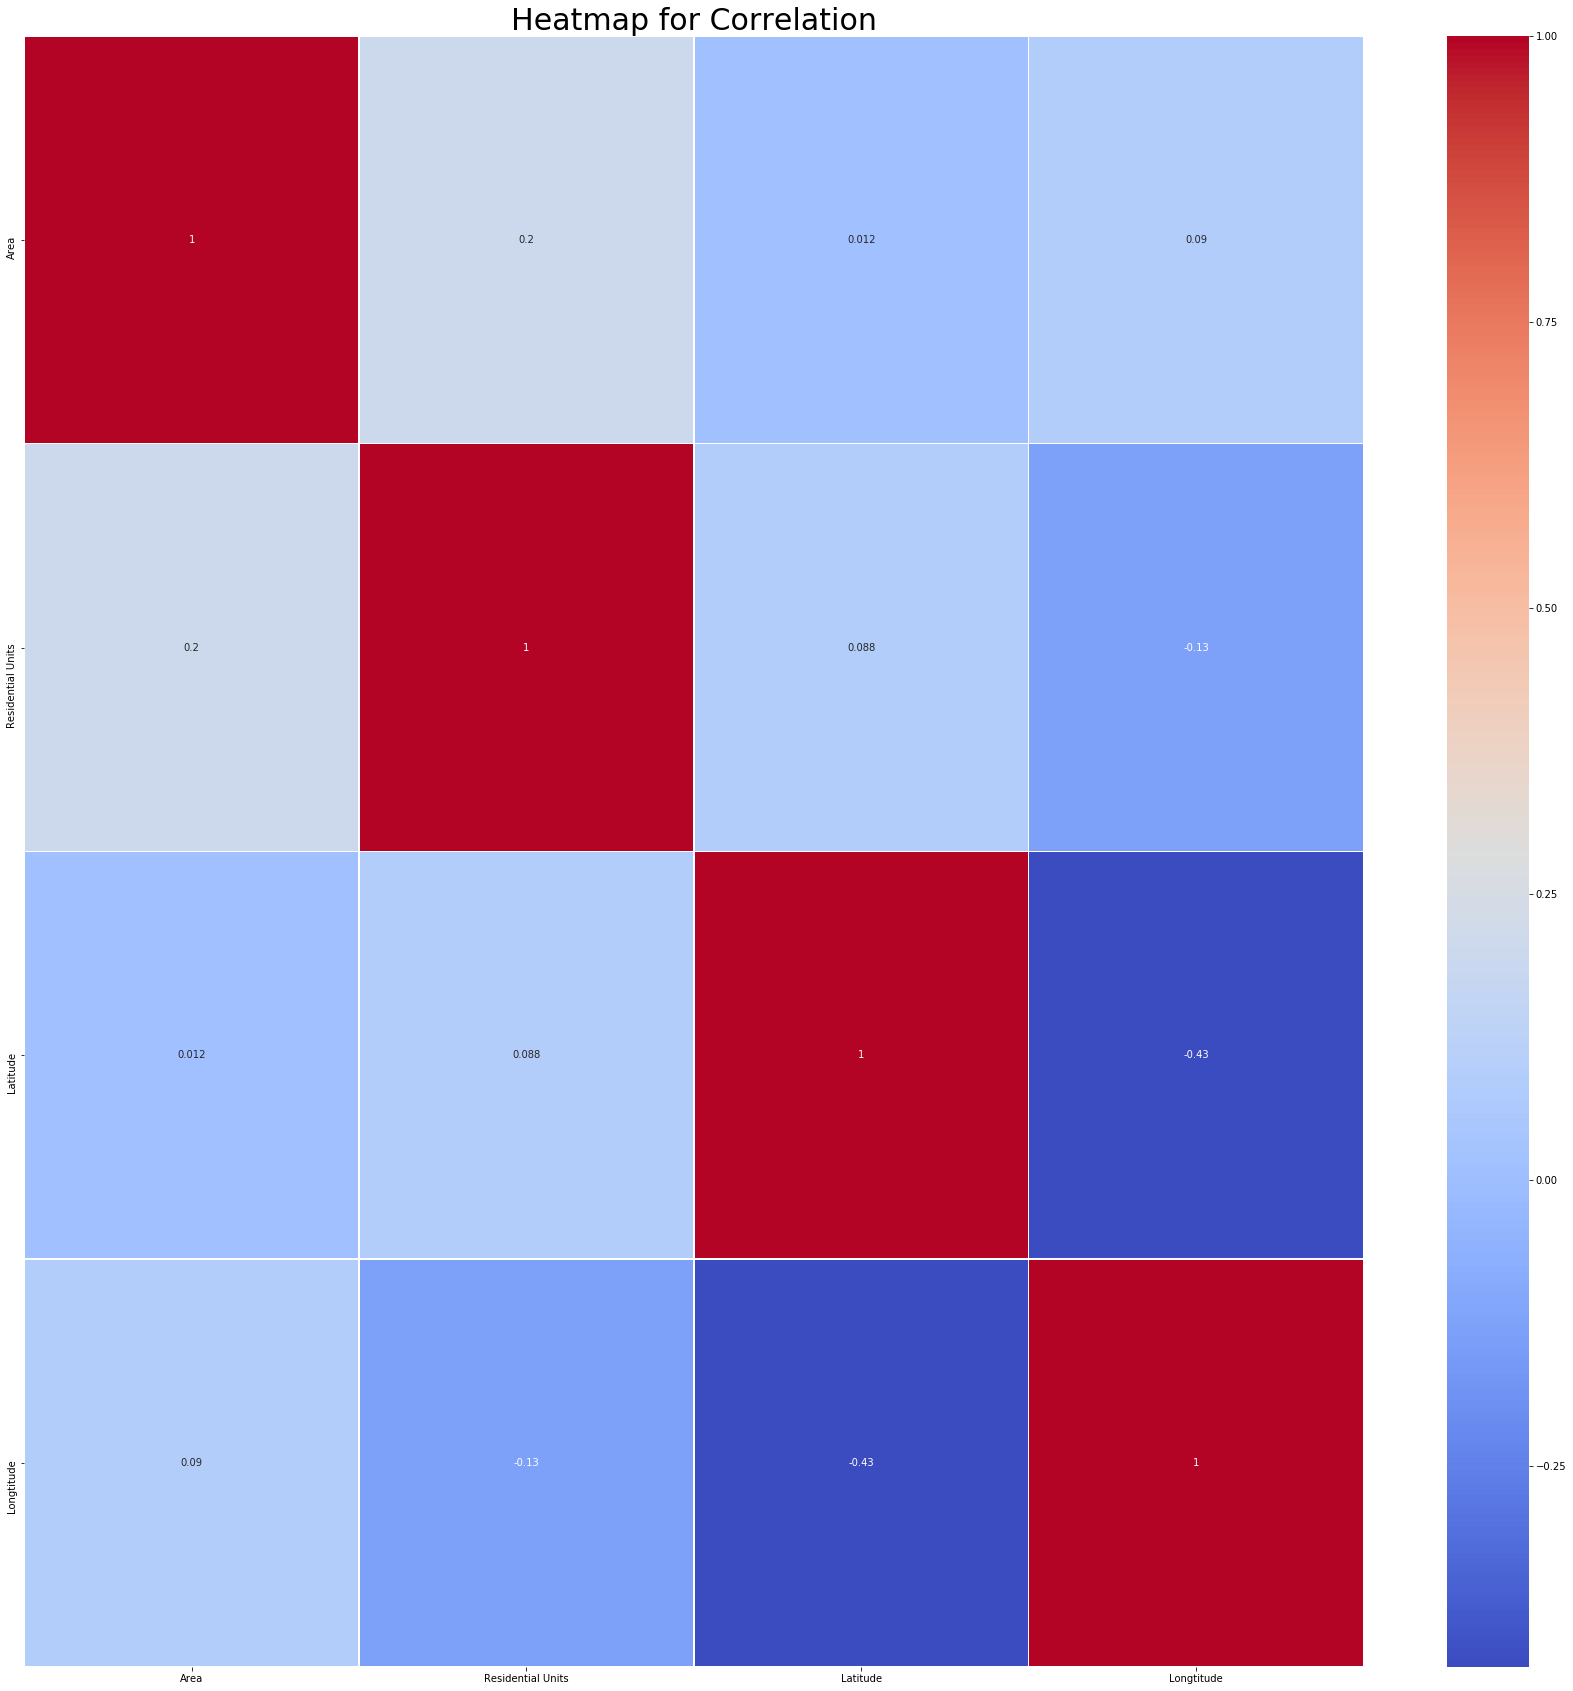

In [20]:
plt.figure(figsize=(30,30))
plt.title('Heatmap for Correlation', fontsize=30)

sns.heatmap(df.corr(), annot=True, linewidth = 0.5, cmap='coolwarm')
plt.show()

**Observation: From heatmap diagram only 0.2 correlation coeffient between Area and Residential Units**

## Create maps to look at all neighbourhoods

In [21]:
#Load the cleaned csv file

df = pd.read_csv("skanclean.csv")

In [22]:
#Get the lat and long coordinates for Sandakan
address = 'Sandakan'

geolocator = Nominatim(user_agent="foursquare_agent")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

5.8391337 118.1158919


In [23]:
#Sandakan Map
map = folium.Map(location=[latitude,longitude], zoom_start=12)
map

<img src="map23.jpg">

In [24]:
#Segment suburbs coordinates

df_suburbs = df[['Latitude','Longtitude']]

In [25]:
df_suburbs.head()

,Latitude,Longtitude
0,5.898035,118.061205
1,5.861322,118.037246
2,5.853584,118.116925
3,5.850209,118.130763
4,5.864637,118.084975


In [26]:
df_suburbs.shape

(65, 2)

In [27]:
suburbs_list = df_suburbs.values.tolist()

In [28]:
suburbs_list_size = len(suburbs_list)

In [29]:
suburbs_list_size

65

In [30]:
#Add Markers
for point in range(0,suburbs_list_size):
    folium.Marker(suburbs_list[point]).add_to(map)

In [31]:
map

<img src="map31.jpg">

In [32]:
#Add Markers with Popup
for point in range(0,suburbs_list_size):
    folium.Marker(suburbs_list[point], popup=df['Neighbourhood'][point]).add_to(map)

In [33]:
map

<img src="map33.jpg">

## Segment and focus Mile 4 to Mile 6 neighbourhoods

In [34]:
df1 = pd.read_csv("segment.csv")

In [35]:
df1

,Neighbourhood,Area,Residential Units,Latitude,Longtitude
0,Bunga Matahari,11.880,172,5.865810,118.075874
1,Casa San Uno,38.890,307,5.865233,118.072556
2,Damai & Sri Taman,21.670,123,5.858482,118.078921
3,Evergreen,23.990,48,5.873464,118.057834
4,Garden Villa,25.760,82,5.863280,118.048945
5,Indah,56.270,356,5.842067,118.066095
6,Indah Jaya,235.680,2752,5.843796,118.067200
7,Lucky & Wemin,43.544,260,5.863112,118.062768
8,Mesra,23.180,1000,5.861271,118.077664
9,Pertama,53.320,438,5.861339,118.069276


In [36]:
df1.shape

(14, 5)

In [37]:
address = 'Sandakan'

geolocator = Nominatim(user_agent="foursquare_agent")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

5.8391337 118.1158919


In [38]:
#Sandakan Map
map1 = folium.Map(location=[latitude,longitude], zoom_start=12)
map1

<img src="map38.jpg">

In [39]:
#Segment Mile 4 to Mile 6 suburbs coordinates

df1_suburbs = df1[['Latitude','Longtitude']]

In [40]:
df1_suburbs

,Latitude,Longtitude
0,5.865810,118.075874
1,5.865233,118.072556
2,5.858482,118.078921
3,5.873464,118.057834
4,5.863280,118.048945
5,5.842067,118.066095
6,5.843796,118.067200
7,5.863112,118.062768
8,5.861271,118.077664
9,5.861339,118.069276


In [41]:
df1_suburbs.shape

(14, 2)

In [42]:
suburbs1_list = df1_suburbs.values.tolist()

In [43]:
suburbs1_list

[[5.8658095, 118.0758739],
 [5.8652331, 118.0725562],
 [5.8584821, 118.0789209],
 [5.8734638, 118.0578338],
 [5.8632801, 118.0489446],
 [5.8420670999999995, 118.06609499999999],
 [5.843796, 118.06720049999998],
 [5.8631125, 118.0627675],
 [5.8612709, 118.07766389999999],
 [5.8613392, 118.06927649999999],
 [5.8610315, 118.0745175],
 [5.85872755, 118.0658041],
 [5.8676695, 118.0599967],
 [5.864600599999999, 118.05856909999999]]

In [44]:
suburbs1_list_size = len(suburbs1_list)

In [45]:
suburbs1_list_size

14

In [46]:
#Add Markers with Popup
for point in range(0,suburbs1_list_size):
    folium.Marker(suburbs1_list[point], popup=df1['Neighbourhood'][point]).add_to(map1)

In [47]:
map1

<img src="map47.jpg">

## Using Foursquare API

**Explore Neighborhoods with that focused segment**

In [48]:
#define our Foursquare credentials and version
CLIENT_ID = 'ZA1DQF403ZFDBZRXJPTGZTZOCFLEFLEKGN0HCDSEZEP4E4WH' # your Foursquare ID
CLIENT_SECRET = '30UY4KEFYWPITP32JWZIRM1I1NPC42EQ5FVEG2LJV5PISLHY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 15

In [49]:
neighborhoods_subset = df1[['Neighbourhood','Latitude','Longtitude']]

In [50]:
neighborhoods_subset

,Neighbourhood,Latitude,Longtitude
0,Bunga Matahari,5.865810,118.075874
1,Casa San Uno,5.865233,118.072556
2,Damai & Sri Taman,5.858482,118.078921
3,Evergreen,5.873464,118.057834
4,Garden Villa,5.863280,118.048945
5,Indah,5.842067,118.066095
6,Indah Jaya,5.843796,118.067200
7,Lucky & Wemin,5.863112,118.062768
8,Mesra,5.861271,118.077664
9,Pertama,5.861339,118.069276


In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
target_venues = getNearbyVenues(names=neighborhoods_subset['Neighbourhood'],
                                   latitudes=neighborhoods_subset['Latitude'],
                                   longitudes=neighborhoods_subset['Longtitude']
                                  )

Bunga Matahari
Casa San Uno
Damai & Sri Taman
Evergreen
Garden Villa
Indah
Indah Jaya
Lucky & Wemin
Mesra
Pertama
Tinosan
Tshun Ngen
Tyng
Utama


In [53]:
print(target_venues.shape)
target_venues

(129, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bunga Matahari,5.865810,118.075874,Sunflower Mini Market Taman Bunga Matahari,5.865544,118.076034,Convenience Store
1,Bunga Matahari,5.865810,118.075874,Starwood Hotels & Resorts,5.866185,118.075382,Hotel
2,Bunga Matahari,5.865810,118.075874,Lee Yuan Chinese Restaurant,5.864253,118.073965,Chinese Restaurant
3,Bunga Matahari,5.865810,118.075874,Taman Tinosan,5.862603,118.073679,Other Great Outdoors
4,Bunga Matahari,5.865810,118.075874,"WHITE HORSE CERAMIC, Bdr. Kim Fung, Sandakan, ...",5.870098,118.075628,Furniture / Home Store
5,Bunga Matahari,5.865810,118.075874,Lubuk,5.870108,118.075571,Outdoors & Recreation
6,Damai & Sri Taman,5.858482,118.078921,Servay Supermarket,5.858409,118.078295,Grocery Store
7,Damai & Sri Taman,5.858482,118.078921,Bandar Kim Fung 金凤市,5.856492,118.078332,Town
8,Damai & Sri Taman,5.858482,118.078921,双日Kopitiam茶餐室,5.856717,118.077535,Deli / Bodega
9,Damai & Sri Taman,5.858482,118.078921,Novelty Cafe & Cake House,5.857198,118.079499,Bakery


In [54]:
#save a copy of csv
#target_venues.to_csv("foursq.csv",index=False)

In [55]:
target_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bunga Matahari,6,6,6,6,6,6
Damai & Sri Taman,15,15,15,15,15,15
Evergreen,3,3,3,3,3,3
Garden Villa,15,15,15,15,15,15
Indah,10,10,10,10,10,10
Indah Jaya,7,7,7,7,7,7
Lucky & Wemin,3,3,3,3,3,3
Mesra,15,15,15,15,15,15
Pertama,4,4,4,4,4,4


In [56]:
print('There are {} uniques categories.'.format(len(target_venues['Venue Category'].unique())))

There are 53 uniques categories.


## Analyze Each Neighborhood

In [57]:
# one hot encoding
target_onehot = pd.get_dummies(target_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
target_onehot['Neighborhood'] = target_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [target_onehot.columns[-1]] + list(target_onehot.columns[:-1])
target_onehot = target_onehot[fixed_columns]

target_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Baseball Stadium,Bed & Breakfast,Beer Garden,Butcher,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Football Stadium,Fruit & Vegetable Store,Furniture / Home Store,Golf Course,Grocery Store,Gym,Hakka Restaurant,Halal Restaurant,Hotel,Indian Restaurant,Indonesian Restaurant,Lounge,Malay Restaurant,Market,Music Venue,Noodle House,Other Great Outdoors,Outdoors & Recreation,Park,Pharmacy,Photography Studio,Pizza Place,Recreation Center,Restaurant,Seafood Restaurant,Sushi Restaurant,Town,Vegetarian / Vegan Restaurant,Wings Joint
0,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Bunga Matahari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
target_onehot.shape

(129, 54)

In [59]:
target_grouped = target_onehot.groupby('Neighborhood').mean().reset_index()
target_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Baseball Stadium,Bed & Breakfast,Beer Garden,Butcher,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Football Stadium,Fruit & Vegetable Store,Furniture / Home Store,Golf Course,Grocery Store,Gym,Hakka Restaurant,Halal Restaurant,Hotel,Indian Restaurant,Indonesian Restaurant,Lounge,Malay Restaurant,Market,Music Venue,Noodle House,Other Great Outdoors,Outdoors & Recreation,Park,Pharmacy,Photography Studio,Pizza Place,Recreation Center,Restaurant,Seafood Restaurant,Sushi Restaurant,Town,Vegetarian / Vegan Restaurant,Wings Joint
0,Bunga Matahari,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
1,Damai & Sri Taman,0.00,0.066667,0.0,0.066667,0.066667,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.133333,0.000000,0.0,0.000000,0.066667,0.066667,0.000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000,0.066667
2,Evergreen,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
3,Garden Villa,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.066667,0.000000,0.333333,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000,0.000000
4,Indah,0.00,0.100000,0.2,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.1,0.000000,0.000000,0.000000,0.000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
5,Indah Jaya,0.00,0.142857,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
6,Lucky & Wemin,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000

In [60]:
target_grouped.shape

(13, 54)

In [61]:
# Print out top 5 venues for each neighbourhood
num_top_venues = 5

for hood in target_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = target_grouped[target_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bunga Matahari----
                    venue  freq
0  Furniture / Home Store  0.17
1      Chinese Restaurant  0.17
2                   Hotel  0.17
3    Other Great Outdoors  0.17
4   Outdoors & Recreation  0.17


----Damai & Sri Taman----
                venue  freq
0       Deli / Bodega  0.13
1  Chinese Restaurant  0.07
2       Grocery Store  0.07
3    Asian Restaurant  0.07
4          Food Court  0.07


----Evergreen----
                 venue  freq
0          Golf Course  0.67
1                  Gym  0.33
2  American Restaurant  0.00
3     Hakka Restaurant  0.00
4     Halal Restaurant  0.00


----Garden Villa----
                venue  freq
0                Café  0.33
1  Chinese Restaurant  0.20
2    Hakka Restaurant  0.07
3    Halal Restaurant  0.07
4    Football Stadium  0.07


----Indah----
                venue  freq
0  Athletics & Sports   0.2
1   Recreation Center   0.1
2          Food Truck   0.1
3    Department Store   0.1
4        Noodle House   0.1


----Indah Jaya----

In [62]:
#Create a function to return common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
#Sort each neighbourhood with top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = target_grouped['Neighborhood']

for ind in np.arange(target_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(target_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,Furniture / Home Store,Convenience Store,Hotel,Outdoors & Recreation,Other Great Outdoors,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
1,Damai & Sri Taman,Deli / Bodega,Wings Joint,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Electronics Store,Hotel,Convenience Store,Food Court,Bakery
2,Evergreen,Golf Course,Gym,Wings Joint,Convenience Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Dim Sum Restaurant
3,Garden Villa,Café,Chinese Restaurant,Football Stadium,Hakka Restaurant,Indian Restaurant,Halal Restaurant,Beer Garden,Photography Studio,Seafood Restaurant,Cupcake Shop
4,Indah,Athletics & Sports,Noodle House,Baseball Stadium,Dim Sum Restaurant,Department Store,Coffee Shop,Food Truck,Recreation Center,Asian Restaurant,Bed & Breakfast
5,Indah Jaya,Food Truck,Asian Restaurant,Grocery Store,Recreation Center,Department Store,Chinese Restaurant,Coffee Shop,Cupcake Shop,Food Court,Fish & Chips Shop
6,Lucky & Wemin,Clothing Store,Park,Chinese Restaurant,Convenience Store,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner
7,Mesra,Electronics Store,Convenience Store,Wings Joint,Other Great Outdoors,Fruit & Vegetable Store,Fast Food Restaurant,Grocery Store,Department Store,Malay Restaurant,Food Court
8,Pertama,Chinese Restaurant,American Restaurant,Noodle House,Athletics & Sports,BBQ Joint,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
9,Tinosan,Bakery,Music Venue,Bed & Breakfast,Malay Restaurant,Chinese Restaurant,Noodle House,Café,Indian Restaurant,Pharmacy,Pizza Place


## Clustering Neighborhoods - Using K-means method

In [64]:
# set number of clusters
kclusters = 5

target_grouped_clustering = target_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(target_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([0, 0, 3, 4, 0, 0, 2, 0, 1, 0, 0, 0, 0])

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

target_merged = neighborhoods_subset

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
target_merged = target_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

target_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,0.0,Furniture / Home Store,Convenience Store,Hotel,Outdoors & Recreation,Other Great Outdoors,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
1,Casa San Uno,5.865233,118.072556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Damai & Sri Taman,5.858482,118.078921,0.0,Deli / Bodega,Wings Joint,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Electronics Store,Hotel,Convenience Store,Food Court,Bakery
3,Evergreen,5.873464,118.057834,3.0,Golf Course,Gym,Wings Joint,Convenience Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Dim Sum Restaurant
4,Garden Villa,5.863280,118.048945,4.0,Café,Chinese Restaurant,Football Stadium,Hakka Restaurant,Indian Restaurant,Halal Restaurant,Beer Garden,Photography Studio,Seafood Restaurant,Cupcake Shop


In [66]:
target_merged #Do a check for all

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,0.0,Furniture / Home Store,Convenience Store,Hotel,Outdoors & Recreation,Other Great Outdoors,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
1,Casa San Uno,5.865233,118.072556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Damai & Sri Taman,5.858482,118.078921,0.0,Deli / Bodega,Wings Joint,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Electronics Store,Hotel,Convenience Store,Food Court,Bakery
3,Evergreen,5.873464,118.057834,3.0,Golf Course,Gym,Wings Joint,Convenience Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Dim Sum Restaurant
4,Garden Villa,5.863280,118.048945,4.0,Café,Chinese Restaurant,Football Stadium,Hakka Restaurant,Indian Restaurant,Halal Restaurant,Beer Garden,Photography Studio,Seafood Restaurant,Cupcake Shop
5,Indah,5.842067,118.066095,0.0,Athletics & Sports,Noodle House,Baseball Stadium,Dim Sum Restaurant,Department Store,Coffee Shop,Food Truck,Recreation Center,Asian Restaurant,Bed & Breakfast
6,Indah Jaya,5.843796,118.067200,0.0,Food Truck,Asian Restaurant,Grocery Store,Recreation Center,Department Store,Chinese Restaurant,Coffee Shop,Cupcake Shop,Food Court,Fish & Chips Shop
7,Lucky & Wemin,5.863112,118.062768,2.0,Clothing Store,Park,Chinese Restaurant,Convenience Store,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner
8,Mesra,5.861271,118.077664,0.0,Electronics Store,Convenience Store,Wings Joint,Other Great Outdoors,Fruit & Vegetable Store,Fast Food Restaurant,Grocery Store,Department Store,Malay Restaurant,Food Court
9,Pertama,5.861339,118.069276,1.0,Chinese Restaurant,American Restaurant,Noodle House,Athletics & Sports,BBQ Joint,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store


In [67]:
target_merged.drop(index=1, inplace=True) #Drop Casa San Uno as there are NaNs

In [68]:
target_merged

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,0.0,Furniture / Home Store,Convenience Store,Hotel,Outdoors & Recreation,Other Great Outdoors,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
2,Damai & Sri Taman,5.858482,118.078921,0.0,Deli / Bodega,Wings Joint,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Electronics Store,Hotel,Convenience Store,Food Court,Bakery
3,Evergreen,5.873464,118.057834,3.0,Golf Course,Gym,Wings Joint,Convenience Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Dim Sum Restaurant
4,Garden Villa,5.863280,118.048945,4.0,Café,Chinese Restaurant,Football Stadium,Hakka Restaurant,Indian Restaurant,Halal Restaurant,Beer Garden,Photography Studio,Seafood Restaurant,Cupcake Shop
5,Indah,5.842067,118.066095,0.0,Athletics & Sports,Noodle House,Baseball Stadium,Dim Sum Restaurant,Department Store,Coffee Shop,Food Truck,Recreation Center,Asian Restaurant,Bed & Breakfast
6,Indah Jaya,5.843796,118.067200,0.0,Food Truck,Asian Restaurant,Grocery Store,Recreation Center,Department Store,Chinese Restaurant,Coffee Shop,Cupcake Shop,Food Court,Fish & Chips Shop
7,Lucky & Wemin,5.863112,118.062768,2.0,Clothing Store,Park,Chinese Restaurant,Convenience Store,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner
8,Mesra,5.861271,118.077664,0.0,Electronics Store,Convenience Store,Wings Joint,Other Great Outdoors,Fruit & Vegetable Store,Fast Food Restaurant,Grocery Store,Department Store,Malay Restaurant,Food Court
9,Pertama,5.861339,118.069276,1.0,Chinese Restaurant,American Restaurant,Noodle House,Athletics & Sports,BBQ Joint,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
10,Tinosan,5.861032,118.074517,0.0,Bakery,Music Venue,Bed & Breakfast,Malay Restaurant,Chinese Restaurant,Noodle House,Café,Indian Restaurant,Pharmacy,Pizza Place


In [69]:
#Convert float to int for Cluster Labels
target_merged['Cluster Labels'] = target_merged['Cluster Labels'].astype(int) 

In [70]:
target_merged

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,0,Furniture / Home Store,Convenience Store,Hotel,Outdoors & Recreation,Other Great Outdoors,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
2,Damai & Sri Taman,5.858482,118.078921,0,Deli / Bodega,Wings Joint,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Electronics Store,Hotel,Convenience Store,Food Court,Bakery
3,Evergreen,5.873464,118.057834,3,Golf Course,Gym,Wings Joint,Convenience Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Dim Sum Restaurant
4,Garden Villa,5.863280,118.048945,4,Café,Chinese Restaurant,Football Stadium,Hakka Restaurant,Indian Restaurant,Halal Restaurant,Beer Garden,Photography Studio,Seafood Restaurant,Cupcake Shop
5,Indah,5.842067,118.066095,0,Athletics & Sports,Noodle House,Baseball Stadium,Dim Sum Restaurant,Department Store,Coffee Shop,Food Truck,Recreation Center,Asian Restaurant,Bed & Breakfast
6,Indah Jaya,5.843796,118.067200,0,Food Truck,Asian Restaurant,Grocery Store,Recreation Center,Department Store,Chinese Restaurant,Coffee Shop,Cupcake Shop,Food Court,Fish & Chips Shop
7,Lucky & Wemin,5.863112,118.062768,2,Clothing Store,Park,Chinese Restaurant,Convenience Store,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner
8,Mesra,5.861271,118.077664,0,Electronics Store,Convenience Store,Wings Joint,Other Great Outdoors,Fruit & Vegetable Store,Fast Food Restaurant,Grocery Store,Department Store,Malay Restaurant,Food Court
9,Pertama,5.861339,118.069276,1,Chinese Restaurant,American Restaurant,Noodle House,Athletics & Sports,BBQ Joint,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
10,Tinosan,5.861032,118.074517,0,Bakery,Music Venue,Bed & Breakfast,Malay Restaurant,Chinese Restaurant,Noodle House,Café,Indian Restaurant,Pharmacy,Pizza Place


In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(target_merged['Latitude'], target_merged['Longtitude'], target_merged['Neighbourhood'], target_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="map71.jpg">

<ul>
<li>Red color =  Cluster 0</li>
<li>Violet color =  Cluster 1</li>
<li>Blue color =  Cluster 2</li>
<li>Green color =  Cluster 3</li>
<li>Yellow color =  Cluster 4</li>
</ul>

## Display each cluster

In [72]:
target_merged.loc[target_merged['Cluster Labels'] == 0]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bunga Matahari,5.865810,118.075874,0,Furniture / Home Store,Convenience Store,Hotel,Outdoors & Recreation,Other Great Outdoors,Chinese Restaurant,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
2,Damai & Sri Taman,5.858482,118.078921,0,Deli / Bodega,Wings Joint,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Electronics Store,Hotel,Convenience Store,Food Court,Bakery
5,Indah,5.842067,118.066095,0,Athletics & Sports,Noodle House,Baseball Stadium,Dim Sum Restaurant,Department Store,Coffee Shop,Food Truck,Recreation Center,Asian Restaurant,Bed & Breakfast
6,Indah Jaya,5.843796,118.067200,0,Food Truck,Asian Restaurant,Grocery Store,Recreation Center,Department Store,Chinese Restaurant,Coffee Shop,Cupcake Shop,Food Court,Fish & Chips Shop
8,Mesra,5.861271,118.077664,0,Electronics Store,Convenience Store,Wings Joint,Other Great Outdoors,Fruit & Vegetable Store,Fast Food Restaurant,Grocery Store,Department Store,Malay Restaurant,Food Court
10,Tinosan,5.861032,118.074517,0,Bakery,Music Venue,Bed & Breakfast,Malay Restaurant,Chinese Restaurant,Noodle House,Café,Indian Restaurant,Pharmacy,Pizza Place
11,Tshun Ngen,5.858728,118.065804,0,Fruit & Vegetable Store,Asian Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Fish & Chips Shop,Chinese Restaurant,Noodle House,Food Truck,Cupcake Shop,Food Court
12,Tyng,5.867669,118.059997,0,Asian Restaurant,Bakery,Noodle House,Chinese Restaurant,Market,Café,Butcher,Cupcake Shop,Restaurant,Sushi Restaurant
13,Utama,5.864601,118.058569,0,Chinese Restaurant,Malay Restaurant,Fast Food Restaurant,Sushi Restaurant,Restaurant,Lounge,Cupcake Shop,Café,Noodle House,Coffee Shop


In [73]:
target_merged.loc[target_merged['Cluster Labels'] == 1]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Pertama,5.861339,118.069276,1,Chinese Restaurant,American Restaurant,Noodle House,Athletics & Sports,BBQ Joint,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store


In [74]:
target_merged.loc[target_merged['Cluster Labels'] == 2]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Lucky & Wemin,5.863112,118.062768,2,Clothing Store,Park,Chinese Restaurant,Convenience Store,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner


In [75]:
target_merged.loc[target_merged['Cluster Labels'] == 3]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Evergreen,5.873464,118.057834,3,Golf Course,Gym,Wings Joint,Convenience Store,Food Court,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Diner,Dim Sum Restaurant


In [76]:
target_merged.loc[target_merged['Cluster Labels'] == 4]

,Neighbourhood,Latitude,Longtitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Garden Villa,5.86328,118.048945,4,Café,Chinese Restaurant,Football Stadium,Hakka Restaurant,Indian Restaurant,Halal Restaurant,Beer Garden,Photography Studio,Seafood Restaurant,Cupcake Shop


##  Results and Discussion

The clustering results gave the most number of neighbourhoods are **cluster 0**. Businesses who are keen in setting up any businesses can refer to the clustering results and what sort of businesses are there.

Business people need to factor in costs like rental, utilities, land prices, transportation, labor etc before setting any businesses.

To recap, we collected data from relevant websites and merged them into a single csv file. Some data exploration were performed to look for any patterns amongst the features.

Then we decided to focus on Mile 4 to Mile 6 neighbourhood areas since majority of them are concentrated there.

We mapped these locations using Folium. We used Foursquare API to get the common venues visited by people who live there.

K-Means clustering is applied to cluster these neighbourhoods to five clusters and the result will give new business owners to analyze what sort of opportunities available.


## Conclusion

The purpose of this project is to explore business opportunities in Sandakan neighbourhoods. Using clustering methods, we can identify popular venues which can be considered by business people.